This notebook explores the typing data, to see what it is all about, and calculates basic statistics to see what we are dealing with. **I am writing a bash-script to do this because well, it is more fun, but more importantly; faster**.

---

In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

# Set path to find modelling tools for later use
import os
import sys
sys.path.append(os.path.join(os.getcwd(),".."))


from haberrspd.preprocess import backspace_corrector

import pandas as pd
import numpy as np
print(np.__version__)
from collections import Counter, defaultdict
from itertools import groupby
from operator import itemgetter

from pathlib import Path
from IPython.display import display

# Plot stuff
import seaborn as sns
from scipy.constants import golden
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Depending on where I am, set the path
import socket
if socket.gethostname() == 'pax':
    # Monster machine
    data_root = '../data/MJFF/' # My local path
    data_root = Path(data_root)
else:
    # Laptop
    data_root = '/home/nd/data/liverpool/MJFF' # My local path
    data_root = Path(data_root)

1.16.4


----

In [2]:
# Meta
df_meta = pd.read_csv(data_root / "EnglishParticipantKey.csv")
# Actual
df = pd.read_csv(data_root / "EnglishData.csv")

In [ ]:
out, reference = create_NLP_datasets_from_MJFF_English_data()

## Filter sentences where the subject is pausing

In [50]:
df.head()

,timestamp,key,response_id,response_created,participant_id,sentence_id,sentence_text,parameters_workerId,parameters_consent
0,1439193925311,H,1010,2015-08-10T08:05:48.674Z,1a,55,"However, religions other than Islam, use a dif...",2,skip
1,1439193925823,o,1010,2015-08-10T08:05:48.674Z,1a,55,"However, religions other than Islam, use a dif...",2,skip
2,1439193926081,w,1010,2015-08-10T08:05:48.674Z,1a,55,"However, religions other than Islam, use a dif...",2,skip
3,1439193926367,e,1010,2015-08-10T08:05:48.674Z,1a,55,"However, religions other than Islam, use a dif...",2,skip
4,1439193926704,v,1010,2015-08-10T08:05:48.674Z,1a,55,"However, religions other than Islam, use a dif...",2,skip


In [51]:
df_meta.tail()

,index,id_num,attempt,diagnosis
77,7b,7,2,1
78,6a,6,1,1
79,8b,8,2,0
80,7a,7,1,1
81,9b,9,2,0


In [57]:
set(df.sentence_id)

{55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}

In [64]:
np.array(set(df.participant_id))

array({'18a', '9b', '16b', '36a', '43b', '30a', '26a', '35b', '11a', '15b', '20a', '38b', '20b', '26b', '7b', '13b', '39a', '10b', '9a', '12b', '31a', '33b', '2a', '31b', '43a', '25b', '28b', '40b', '5a', '27b', '17b', '4a', '19a', '19b', '18b', '34a', '38a', '14a', '2b', '1b', '21b', '29b', '32a', '35a', '1a', '41a', '12a', '22b', '27a', '10a', '44b', '44a', '8a', '13a', '30b', '6b', '33a', '11b', '37b', '32b', '41b', '4b', '42a', '29a', '22a', '17a', '7a', '25a', '14b', '42b', '5b', '28a', '34b', '16a', '39b', '6a', '40a', '36b', '37a', '15a', '21a', '8b'},
      dtype=object)

In [71]:
timestamp_diffs = []
for part in set(df.participant_id):
    timestamp_diffs.extend(df.loc[(df.sentence_id == 57) & (df.participant_id == part)].timestamp.diff().values)
    #.hist(figsize=(13,6),bins=100)

In [77]:
cleaned_list = [x for x in timestamp_diffs if str(x) != 'nan']

In [78]:
max(cleaned_list)

9138.0

In [86]:
np.mean(cleaned_list)

454.9717622450758

In [89]:
np.quantile(cleaned_list,0.75)

523.0

In [132]:
from scipy.stats import (gamma, lognorm, gengamma)
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,len(cleaned_list),1)
y = cleaned_list

## 

## Generalised GAMMA

In [128]:
a1, b1, loc1, scale1 = gengamma.fit(y,loc=0,scale=1)

In [129]:
print(a1, b1, loc1, scale1)

1.9454974189956014 -0.7800000217626071 1.2953093184712001 511.6858283292154


In [131]:
gengamma.stats(a=a1, c=b1, loc=loc1, scale=scale1, moments='mvsk')

(array(712.66783628), array(-1513982.8859494), array(nan), array(-5.59842483))

In [ ]:
gengamma.ppf()

In [118]:
shape, loc, scale = lognorm.fit(y)

In [122]:
lognorm.stats(shape,loc,scale, 'mvsk')

(array(8.82243917e+19),
 array(5.88926488e+78),
 array(2.08125653e+58),
 array(3.27744165e+155))

In [109]:
print(shape1, loc1, scale1)

0.0005414875871023628 1.9999999999999853 4.056444924618752


In [111]:
1 / shape1*scale1

7491.298085567974

In [115]:
gamma.stats(shape1, loc1, scale1,'mvsk') 

(array(2.00219651),
 array(0.00891004),
 array(85.94799362),
 array(11080.58641216))

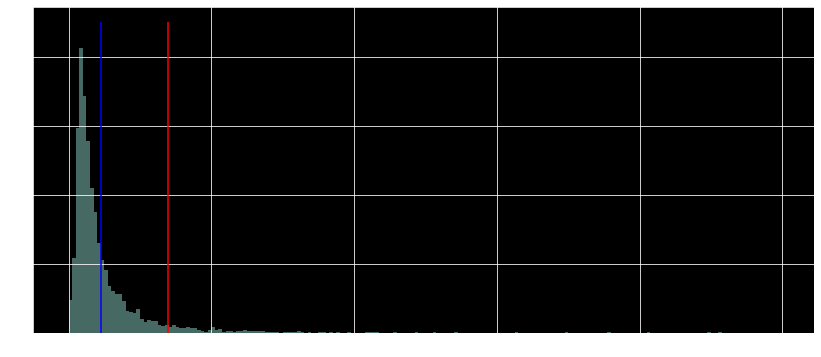

In [95]:
# fixed bin size
bins = np.arange(0, 10000, 50) # fixed bin size
# plt.xlim([min(data)-5, max(data)+5])
fig = plt.figure(figsize=(14,6))
plt.hist(cleaned_list, bins=bins, alpha=0.5)
plt.vlines(np.quantile(cleaned_list,0.95),0,900,'r')
plt.vlines(np.mean(cleaned_list),0,900,'b')
plt.grid(True)
plt.show()


## Backspace correction

In [3]:
from haberrspd.preprocess import create_char_compression_time_mjff_data, backspace_corrector

In [4]:
out = df.loc[(df.participant_id == '20a') & (df.sentence_id == 59), 'key']
out2 = df.loc[(df.participant_id == '20a') & (df.sentence_id == 59), 'timestamp']

In [5]:
np.array(out)

array(['T', 'h', 'e', ' ', 'F', 'r', 'a', 'n', 'k', 's', ' ', 'a', 'l',
       'l', 'i', 'backspace', 'backspace', 'backspace', 'backspace', 'A',
       'l', 'i', 'i', 'n', 'c', 'e', 'backspace', 'backspace',
       'backspace', 'backspace', 'backspace', 'l', 'i', 'a', 'n', 'c',
       'e', ' ', 'w', 'a', 's', ' ', 'i', 'm', 'p', 'o', 'r', 't', 'N',
       'T', 'backspace', 'backspace', 'a', 'n', 't', ' ', 'e', 'x', 'a',
       'c', 't', 'l', 'y', ' ', 'b', 'e', 'c', 'a', 's', 'u', 'e',
       'backspace', 'backspace', 'backspace', 'u', 's', 'e', ' ', 'o',
       'f', ' ', 't', 'h', 'e', 'i', 'r', ' ', 'r', 'e', 'n', 'o', 'w',
       'n', ' ', 'h', 'o', 's', 't', 'i', 'l', 'i', 't', 'i', 'y',
       'backspace', 'backspace'], dtype=object)

In [6]:
len(out2)

106

In [7]:
characters,indices = backspace_corrector(out.tolist(),verbose=True)

Original sentence: ['T', 'h', 'e', ' ', 'F', 'r', 'a', 'n', 'k', 's', ' ', 'a', 'l', 'l', 'i', 'backspace', 'backspace', 'backspace', 'backspace', 'A', 'l', 'i', 'i', 'n', 'c', 'e', 'backspace', 'backspace', 'backspace', 'backspace', 'backspace', 'l', 'i', 'a', 'n', 'c', 'e', ' ', 'w', 'a', 's', ' ', 'i', 'm', 'p', 'o', 'r', 't', 'N', 'T', 'backspace', 'backspace', 'a', 'n', 't', ' ', 'e', 'x', 'a', 'c', 't', 'l', 'y', ' ', 'b', 'e', 'c', 'a', 's', 'u', 'e', 'backspace', 'backspace', 'backspace', 'u', 's', 'e', ' ', 'o', 'f', ' ', 't', 'h', 'e', 'i', 'r', ' ', 'r', 'e', 'n', 'o', 'w', 'n', ' ', 'h', 'o', 's', 't', 'i', 'l', 'i', 't', 'i', 'y', 'backspace', 'backspace']

Edited sentence: ['T', 'h', 'e', ' ', 'F', 'r', 'a', 'n', 'k', 's', ' ', 'a', 'l', 'i', 'i', 'a', 'n', 'c', 'e', ' ', 'w', 'a', 's', ' ', 'i', 'm', 'p', 'o', 'r', 't', 'N', 'n', 't', ' ', 'e', 'x', 'a', 'c', 't', 'l', 'y', ' ', 'b', 'e', 'c', 'a', 's', 's', 'e', ' ', 'o', 'f', ' ', 't', 'h', 'e', 'i', 'r', ' ', 'r', 'e'

In [37]:
backspace_corrector(['backspace'] + list('pesto'))[0]

['p', 'e', 's', 't', 'o']

In [10]:
from haberrspd.preprocess import make_character_compression_time_sentence

In [4]:
out = create_char_compression_time_mjff_data(df)

subject: 10a -- sentence: 55
subject: 10a -- sentence: 56
subject: 10a -- sentence: 57
subject: 10a -- sentence: 58
subject: 10a -- sentence: 59
subject: 10a -- sentence: 60
subject: 10a -- sentence: 61
subject: 10a -- sentence: 62
subject: 10a -- sentence: 63
subject: 10a -- sentence: 64
subject: 10a -- sentence: 65
subject: 10a -- sentence: 66
subject: 10a -- sentence: 67
subject: 10a -- sentence: 68
subject: 10a -- sentence: 69
subject: 10b -- sentence: 55
subject: 10b -- sentence: 56
subject: 10b -- sentence: 57
subject: 10b -- sentence: 58
subject: 10b -- sentence: 59
subject: 10b -- sentence: 60
subject: 10b -- sentence: 61
subject: 10b -- sentence: 62
subject: 10b -- sentence: 63
subject: 10b -- sentence: 64
subject: 10b -- sentence: 65
subject: 10b -- sentence: 66
subject: 10b -- sentence: 67
subject: 10b -- sentence: 68
subject: 10b -- sentence: 69
subject: 11a -- sentence: 55
subject: 11a -- sentence: 56
subject: 11a -- sentence: 57
subject: 11a -- sentence: 58
subject: 11a -

In [4]:
a,b = df.loc[(df.response_id == 2111), 'timestamp'].timestamp, df.loc[df.response_id == 2111].key.tolist()

In [9]:
a = df.loc[(df.response_id == 2111), 'timestamp'].tolist()

In [29]:
sent = list(str('thingingking'))
removal_character = 'backspace'
sent  = [removal_character if x=='B' else x for x in sent]
sentence = copy.copy(sent)

In [5]:
corrected_sentence,removed_indices = backspace_corrector(b)

In [11]:
out = a.reset_index(drop=True).drop(removed_indices)

### Save the English data to use in downstream tasks

In [7]:
out.to_csv(data_root /'preprocessed_EnglishData.csv',index=False)
reference.to_csv(data_root /'EnglishData_target_sentences.csv',index=False)

### Mechanical turk data

In [15]:
out.to_csv(data_root /'preprocessed_MechanicalTurkCombinedEnglishData.csv',index=False)

In [14]:
ls ../data/MJFF/

EnglishData.csv
EnglishParticipantKey.csv
fasttext/
MechanicalTurkCombinedEnglishData.csv
MechanicalTurkEnglishParticipantKey.csv
MTurk1.csv
MTurk2.csv
preprocessed_EnglishData.csv
preprocessed_MechanicalTurkCombinedEnglishData.csv
README
SpanishData.csv
SpanishParticipantKey.csv
test_MJFF_English.csv
train_MJFF_English.csv
validate_MJFF_English.csv


### IKI extraction

In [4]:
out = create_mjff_iki_training_data(df)

In [6]:
out['10a'][0]

array([    0,   141,   235,   323,   414,   525,   723,   940,  1081,
        1161,  1215,  1290,  1573,  1687,  1778,  1885,  2000,  2465,
        2689,  2769,  2926,  3044,  3122,  3189,  3508,  3703,  3796,
        3942,  4053,  4196,  4464,  4663,  4777,  4875,  4973,  5081,
        5230,  5341,  5453,  5480,  5597,  5758,  6091,  6332,  6342,
        6813,  6934,  7104,  7242,  7381,  7471,  7518,  7690,  7774,
        7914,  8089,  8250,  8377,  8531,  9315,  9357,  9879,  9965,
       10131, 10258, 10366, 10445, 10589, 10680, 10754, 10826, 10952,
       11016, 11124, 11204, 11385, 11545, 11753, 11891, 12135, 12496,
       12839, 13018, 13115, 13184, 13351, 13719, 13935, 14118, 14641,
       14724, 15892, 16062, 16332, 16462, 16584, 16906, 16981, 17413,
       17541, 17696, 17758, 17834, 17986, 18108, 18122, 18193, 18348,
       18529, 18923, 19083, 19224, 19555, 19749, 20011, 20052, 20179,
       20259, 20714, 20847, 21805, 21920, 22047, 22534, 22981, 23118,
       24108, 24205,

## Add Spanish data

In [2]:
test = create_NLP_datasets_from_MJFF_Spanish_data()

/home/neil/cloud/haberrspd/notebooks/../haberrspd/preprocess.py:263: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  invoked_sentence = np.delete(sentence, remove_cords).tolist()


In [5]:
test.to_csv(data_root /'preprocessed_SpanishData.csv',index=False)

## Long format data

In [3]:
from haberrspd.preprocess import create_char_compression_time_mjff_data, create_long_form_NLP_datasets_from_MJFF_English_data

In [4]:
df.head()

,timestamp,key,response_id,response_created,participant_id,sentence_id,sentence_text,parameters_workerId,parameters_consent
0,1439193925311,H,1010,2015-08-10T08:05:48.674Z,1a,55,"However, religions other than Islam, use a dif...",2,skip
1,1439193925823,o,1010,2015-08-10T08:05:48.674Z,1a,55,"However, religions other than Islam, use a dif...",2,skip
2,1439193926081,w,1010,2015-08-10T08:05:48.674Z,1a,55,"However, religions other than Islam, use a dif...",2,skip
3,1439193926367,e,1010,2015-08-10T08:05:48.674Z,1a,55,"However, religions other than Islam, use a dif...",2,skip
4,1439193926704,v,1010,2015-08-10T08:05:48.674Z,1a,55,"However, religions other than Islam, use a dif...",2,skip


In [5]:
out = create_char_compression_time_mjff_data(df)

/home/neil/cloud/haberrspd/notebooks/../haberrspd/preprocess.py:367: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  invoked_sentence = np.delete(sentence, remove_cords).tolist()


In [12]:
out['10a'][55]

'HHHHHHHHHHHHHHHHHHooooooooooooooooooooooooooowwwwwwwwwwwwwwwwwwwwwweeeeeeeeeeeeeevvvvvvvvveeeeeeeeerrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr,,,,,,               rrrrreeeeeeeeelllllllllaaaaaaaaaaaattttttiiiiiiioooooooooooooooonnnnnnnnnnnnssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssiiiiiiiiiiiiiiiiiiiiiigggggggggggggiiiiiiooooooooooooooooonnnnnnnnnnsssssssssssssssssssssssssssssssssssssssssssssss

In [11]:
for sub in out.keys():
    tmp = []
    for sent in out[sub].keys():
        tmp.append(len(out[sub][sent]))
    print('The sequence lengths for subject {0} is: {1}.'.format(sub, tmp))

The sequence lengths for subject 10a is: [2537, 1412, 1076, 1819, 1447, 2327, 2263, 2249, 2528, 1314, 1834, 2015, 2354, 1576, 1620].
The sequence lengths for subject 10b is: [1748, 1030, 952, 1900, 1508, 2370, 2477, 1819, 2222, 1247, 1840, 1876, 2275, 1533, 2157].
The sequence lengths for subject 11a is: [2504, 1449, 1371, 2649, 2003, 2846, 2462, 2518, 3481, 1751, 2193, 2638, 2600, 2537, 2417].
The sequence lengths for subject 11b is: [2600, 1423, 1398, 2446, 2093, 2565, 2445, 2661, 2575, 1808, 2316, 2282, 3095, 2245, 2318].
The sequence lengths for subject 12a is: [5067, 3169, 2402, 4586, 3745, 5651, 4785, 5172, 6072, 3796, 5818, 5628, 6626, 4866, 4565].
The sequence lengths for subject 12b is: [4373, 2957, 2399, 4042, 3756, 6441, 5051, 5236, 6505, 4214, 5212, 7894, 6697, 4746, 4727].
The sequence lengths for subject 13a is: [4531, 2380, 2159, 3692, 3566, 5391, 3758, 3769, 5110, 2572, 3881, 4713, 4492, 3373, 4031].
The sequence lengths for subject 13b is: [5138, 2070, 1892, 3536, 3217

In [9]:
a,b = create_long_form_NLP_datasets_from_MJFF_English_data()

In [13]:
a.head()

,Patient_ID,Diagnosis,Sentence_ID,Preprocessed_typed_sentence
0,10a,0,55,HHHHHHHHHHHHHHHHHHooooooooooooooooooooooooooow...
1,10a,0,56,HHHHHHHHHHeeeee iiiiiiiiisssssss ...
2,10a,0,57,BBBBBBBBBBBBBBBBBBBBBBBBBBoooooooooooooooooooo...
3,10a,0,58,TTTTTTTTTTTTTThhhhhhhheeeeeeeeeeeeeeeeeeeeeeee...
4,10a,0,59,TTTTTTTTTTTTTThhhhhhheeeeeeee ...


In [10]:
a.Preprocessed_typed_sentence[0]

,Patient_ID,Diagnosis,Sentence_ID,Preprocessed_typed_sentence
0,10a,0,55,HHHHHHHHHHHHHHHHHHooooooooooooooooooooooooooow...
1,10a,0,56,HHHHHHHHHHeeeee iiiiiiiiisssssss ...
2,10a,0,57,BBBBBBBBBBBBBBBBBBBBBBBBBBoooooooooooooooooooo...
3,10a,0,58,TTTTTTTTTTTTTThhhhhhhheeeeeeeeeeeeeeeeeeeeeeee...
4,10a,0,59,TTTTTTTTTTTTTThhhhhhheeeeeeee ...
